# Assignment 1
**Due date** October 24th, 2024.

Please fo not forget to add your names, student IDs, and emails in this file.

Michael Cornish, 400437974, cornishm@mcmaster.ca

Luvlyn Kotian, 400305478, kotianl@mcmaster.ca
<a target="_blank" href="https://colab.research.google.com/github/ChemAI-Lab/Math4Chem/blob/main/website/Assigments/assigment_1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [3]:
# run this line to install Rdkit library
#!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 14.9 MB/s eta 0:00:00


In [1]:
# load the required libraries that you will need for this assignment
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import sympy as sp

#  [5 marks]
# loading any libraries in other cells will deduct you marks.

ModuleNotFoundError: No module named 'sympy'

In [5]:
# import this additional libraries
import pandas as pd
from rdkit.Chem import AllChem, Descriptors, MolFromSmiles, MolToSmiles
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdFingerprintGenerator

# Question 1
The van der Waals equation of state is given by,
$$
P(V,T) = \frac{RT}{V-b} - \frac{a}{V^2}
$$
where $P(V,T)$ is the pressure, $R$ is the ideal gas constant, $T$ is the temperature, $V$ is the molar volume, and $a$ and $b$ are constants.
The value of $a$ and $b$ are,
* a = 1.38169 $\frac{bar\; L^2}{mol}$
* b = 0.0387 $\frac{L}{mol}$
*
The van der Waals equation of state is normally only used to model the gas.

## Q1.a [5 marks]
Plot $P$ vs $V$ with for an isotherm ($T=77.25K$).
For the plot to look ``nice'' the grid must have the following properties,
1. lowest and maximum values of $V$ are, $V_{min} = 0.045 \frac{L}{mol}$, and $V_{max} = 1 \frac{L}{mol}$.
2. the total grid must have 10,000 points
   
Create a function that computes $P$ using the van der Waals equation of state. <br>


In [6]:
# code for the grid


v_min = 0.045  # L/mol
v_max = 1  # L/mol
delta_v = 1E-5
n_points = 10000


v_grid = np.linspace(v_min, v_max,n_points)

In [7]:
# code for P state function
def P_vanW(V,T):

  T = 77.25 #K
  a = 1.38169 # bar L^2/mol
  b = 0.0387 # L/mol
  p = ((0.08314)*(T))/(V-b) - a/(V**2)
  return p

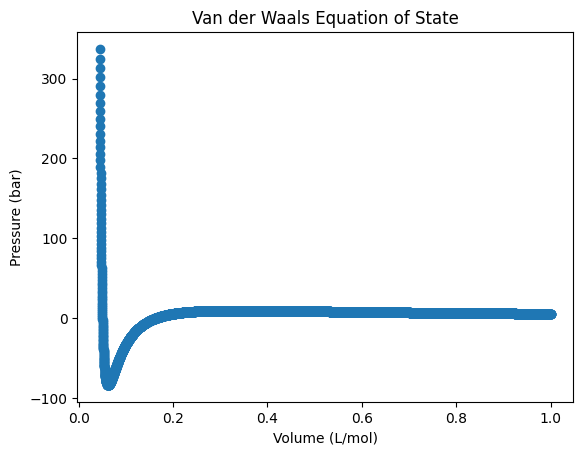

In [8]:
# code for plotting P state function
# The x-axis and y-axis must specify the name of the variables you are plotting. (marks will be deduced if you do not specify what variable is each axis)

T = 77.25
p = P_vanW(v_grid,T)
plt.scatter(v_grid, p)
plt.xlabel('Volume (L/mol)')
plt.ylabel('Pressure (bar)')
plt.title('Van der Waals Equation of State')
plt.show()

## Q1.b [10 marks]

From the fundamental equation of thermodynamics we can define the following equality,
$$
\int_{P_1}^{P_2} V(P)\;dP = \int_{V_1}^{V_2} V \left (\frac{\partial P}{\partial V} \right )_{T}dV
$$

As you can see from this integral it is also necessary the computation of partial derivative of the state function P.


Compute the partial derivative of $P(V,T)$ with respect to $V$ at $T=77.25K$ using the following numerical approximation for the derivative. <br>
**Three-point forward difference formula:**
$$
\frac{\partial f}{\partial x} \approx \frac{-3 f(x) + 4f(x+h) - f(x+2h)}{2h}
$$
where $f(x)$ is the function you want to differentiate, $x$ is the variable, and $h$ is the step size.

1. Create a python function that computes the derivative of P with respect to V using the three-point forward difference.
2. Cerate a python function that computes the analytical derivative of P with respect to V.
3. Compute the Frobenius norm of the difference of the derivative of P with respect to V computed with both methods.
Compare your results with the analytical solution (extra exercise for your midterm).

Verify the output of any of both functions is the same size as the grid of the input.

In [9]:

def three_point_differentiation(f, V, h):
    return (-3*f(V) + 4*f(V+h) - f(V+2*h))/(2*h)


V = 1
T = 77.25

h = 0.01

print(three_point_differentiation(lambda V: P_vanW(V, T), V, h))




-4.186319793994997


In [10]:
# partial derivative of P with respect to V at constant T
def dP_dV(V,T):
  T = 77.25 #K
  a = 1.38169 # bar L^2/mol
  b = 0.0387 # L/mol
  V = 1
  #p = ((0.08314)*(T))/(V-b) - a/(V**2)
  return ((-0.08314)*T)/((V-b)**2) - (a/V**3)

print(dP_dV(V,T))



-8.331783122730346


In [14]:
# value the Frobenius norm of the difference of the derivative compute with three-point forward difference and the analytical derivative.
Frobenius_norm = np.linalg.norm((dP_dV(v_grid,T) - three_point_differentiation(lambda V: P_vanW(V, T), v_grid, h)))
print(Frobenius_norm)

# code here

258642.4256222402


## Q1.c numerical integration [10marks]

In class we saw that the integral of a function can be approximated using the sum of the integrand.<br>
**Composite Three-Point Trapezoidal Rule:**
For a uniform grid where $h$ is the spacing between consecutive points, the composite three-point trapezoidal rule can be written as,
$$
\int_{a}^{b} f(x) dx = \frac{h}{4} \sum_{i=0}^{N-3} \left (f(x_i) + 2f(x_{i+1}) + f(x_{i+2}) \right )
$$
where $N$ is the number of grid points.

1. Create a python function for the three-point trapezoidal rule for numerical integration.
2. Cerate a python function that computes the analytical integration of $\int_{V_1}^{V_2} V \left (\frac{\partial P}{\partial V} \right )_{T}dV$ for different values of $V_1$ and $V_2$ and T.
3. Compare your three-point trapezoidal rule function for this example with the analytical number.
4. Compute the Frobenius norm of the difference of the derivative of P with respect to V computed with both methods.
Compare your results with the analytical solution (extra exercise for your midterm).

In [64]:
def three_point_trapezoidal_rule(f,a,b,N):
    # code here


    h = (b - a) / (N - 1) #grid spacing

    x = np.linspace(a, b, N)  # grid points
    result = 0

    for i in range(N - 2):

      if np.isclose(x[i], 1.38169, atol=1e-10) or np.isclose(x[i+1], 1.38169, atol=1e-10) or np.isclose(x[i+2], 1.38169, atol=1e-10):
          continue
      result += (f(x[i]) + 2 * f(x[i+1]) + f(x[i+2]))


    result *= h / 4
    return result






def f(x):
  return ((0.08314) * 77.25) / (x - 1.38169) - 0.0387 / (V**2)

a = 0
b = 10
N = 20

print(three_point_trapezoidal_rule(f,a,b,N))

21.235392918269536


In [68]:
# function that computes the analytical integral of int V (dP/dV)_T
def analytical_integral(V_min,V_max,T,R=0.08314,a=1.38169,b=0.0387):

  V = sp.symbols('V')

  P = (R * T) / (V - b) - (a / V**2)

  dP_dV = sp.diff(P, V)

  Integrand = V * dP_dV

  integral = sp.integrate(Integrand, (V, V_min, V_max))

  return integral

V_min = 1
V_max = 2
T = 298.15



result = analytical_integral(V_min,V_max,T)
print(result)

1.38169000000000


In [ ]:
# Comparison: The three point rule and the analytical integration are relatively far off of eachother, by about 20.

In [73]:
difference = (21.235392918269536 - 1.38169000000000)
Frobenius_norm1 = np.linalg.norm(difference)
print(Frobenius_norm1)

19.853702918269537


## Question 2

## Q2 Tanimoto similarity function [10marks]

Later in class we will see that a molecule can be represented numerically using a **finger prints** representation. This numerical vector is used describe each individual molecule,
for example for the molecule of caffeine,


Now, suppose you have a database of 5,000 molecules.<br>
To find the similarity of the caffeine molecule with the database. <br>
You would calculate the **Tanimoto similarity** between each molecule in the database and the caffeine molecule.<br>


**Tanimoto similarity**
$$
TS(\mathbf{x}, \mathbf{x}') = \frac{\mathbf{x}^\top\mathbf{x}'}{\|\mathbf{x}\|^2 + \|\mathbf{x}'\|^2 - \mathbf{x}^\top\mathbf{x}'},
$$
where
* $\mathbf{x}$ is the fingerprint representation of a molecule
* $\mathbf{x}^\top\mathbf{x}'$ is the dot product between two molecules' fingerprint representation
* $\|\mathbf{x}\|^2$ is the square norm of the fingerprint representation; $\|\mathbf{x}\|^2 = \sum_i^n x_i^2$

1. Two structures are usually considered similar if $TS > 0.5$.
From the database, how many molecules are similar to the caffeine molecule?
1. Plot a histogram of the Tanimoto similarity between each molecule in the database and the caffeine molecule. The histogram must have 200 bins.
2. What is the less similar molecule to caffeine.
3. What is the average Tanimoto similarity between each molecule in the database and caffeine?

In [ ]:
# code to get the fingerprint representation for each molecule
def get_fingerprints(m_smiles, radius=2, nbits=2048):
  m = AllChem.MolFromSmiles(m_smiles)
  m = AllChem.AddHs(m)
  m_fingerprints = AllChem.GetMorganFingerprintAsBitVect(
      m, radius=radius, nBits=nbits)
  return np.asarray(m_fingerprints)

In [ ]:
# Tanimoto similarity
def tanimoto_similarity(fp_molecule1, fp_molecule2):

    x = fp_molecule1
    xp = fp_molecule2

    # code here
    dot_product = np.dot(x,xp)
    norm_x = np.linalg.norm(x)
    norm_xp = np.linalg.norm(xp)
    similarity = dot_product/(norm_x**2 + norm_xp**2 - dot_product)
    return similarity
    num_similar = np.sum(similarity > 0.5)
    print(num_similar)

[0 0 0 ... 0 0 0]


[22:57:32] DEPRECATION WARNING: please use MorganGenerator


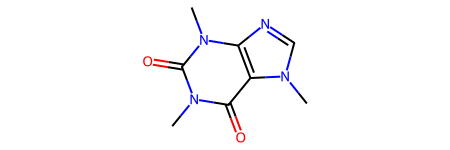

In [ ]:
# caffeine molecule
smiles_caff = 'Cn1cnc2c1c(=O)n(C)c(=O)n2C'
# get the fingerprint representation of caffeine molecule
x_caff = get_fingerprints(smiles_caff)
print(x_caff)


# template for plotting the molecule
m = AllChem.MolFromSmiles(smiles_caff)
m

[22:57:36] DEPRECATION WARNING: please use MorganGenerator


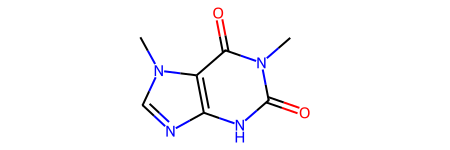

In [ ]:
# Paraxanthine
parax_sm = 'O=C2Nc1ncn(c1C(=O)N2C)C'
m1 = MolFromSmiles(parax_sm)
x_parax_fp = get_fingerprints(parax_sm)
m1

In [ ]:
# similarity between Paraxanthine and Caffeine
similarity = tanimoto_similarity(x_caff, x_parax_fp)
print('Similarity = ', similarity)

Similarity =  0.5365853658536586


In [ ]:
#load the database
data_file = 'https://github.com/ChemAI-Lab/Math4Chem/raw/main/website/Assigments/solubility.csv'
data = pd.read_csv(data_file)
data = data['SMILES']
print('Total data points: ',len(data))

Total data points:  9982


In [ ]:
# note you will get an error that says DEPRECATION WARNING: please use MorganGenerator, do not worry!
similarities = np.zeros(len(data)) # vector to store the similarity
for i, si in enumerate(data):
    # get the fingerprint representation of each molecule in the database
    fp = get_fingerprints(si)

    # calculate the Tanimoto similarity between the caffeine molecule and each molecule in the database
    similarity = tanimoto_similarity(x_caff, fp)
    # add the similarity to a list
    similarities[i] = similarity

Streaming output truncated to the last 5000 lines.
[22:57:57] DEPRECATION WARNING: please use MorganGenerator
[22:57:57] DEPRECATION WARNING: please use MorganGenerator
[22:57:57] DEPRECATION WARNING: please use MorganGenerator
[22:57:57] DEPRECATION WARNING: please use MorganGenerator
[22:57:57] DEPRECATION WARNING: please use MorganGenerator
[22:57:57] DEPRECATION WARNING: please use MorganGenerator
[22:57:57] DEPRECATION WARNING: please use MorganGenerator
[22:57:57] DEPRECATION WARNING: please use MorganGenerator
[22:57:57] DEPRECATION WARNING: please use MorganGenerator
[22:57:57] DEPRECATION WARNING: please use MorganGenerator
[22:57:57] DEPRECATION WARNING: please use MorganGenerator
[22:57:57] DEPRECATION WARNING: please use MorganGenerator
[22:57:57] DEPRECATION WARNING: please use MorganGenerator
[22:57:57] DEPRECATION WARNING: please use MorganGenerator
[22:57:57] DEPRECATION WARNING: please use MorganGenerator
[22:57:57] DEPRECATION WARNING: please use MorganGenerator
[22:5

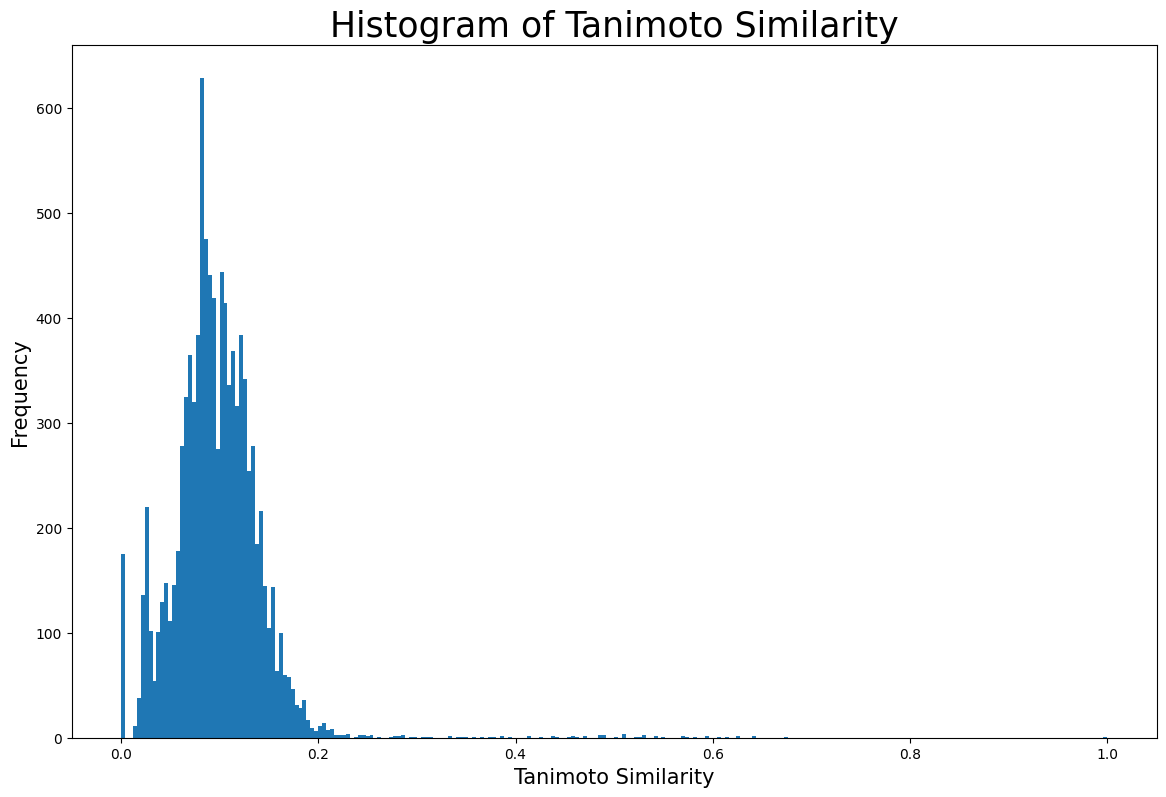

In [ ]:
# plot the histogram of the Tanimoto similarity here
# make the necessary adjustments to make the plot prettier
plt.figure(figsize=(14, 9))
plt.hist(similarities, bins=250)
plt.xlabel('Tanimoto Similarity', fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)
plt.title('Histogram of Tanimoto Similarity', fontsize = 25)
plt.show()


In [ ]:
#average of the similarity
average_similarity = np.mean(similarities)
print(average_similarity)
#maximum and minimum value of the TS. You can get the molecule in the database using # np.argsort(similarities) Check the Numpy documentation.
np.argsort(similarities)
min_similarity = np.min(similarities)
max_similarity = np.max(similarities)

print(min_similarity)
print(max_similarity)

0.09766709361962717
0.0
1.0


### Extra code for plotting molecules
This code can help you plot each molecule in the database

[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C


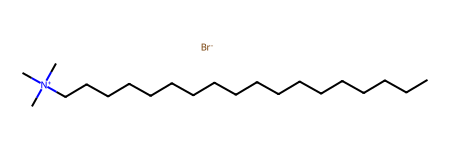

In [ ]:
# The database's first molecule is

s0 = data.iloc[0]
print(s0)
m0 = AllChem.MolFromSmiles(s0)
m0



CN(C)c1ccc(C=O)cc1


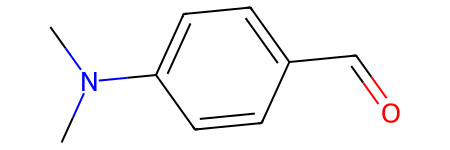

In [ ]:
# the 10th molecule is,
s0 = data.iloc[10]
print(s0)
m0 = AllChem.MolFromSmiles(s0)
m0